## Cavity Modes, Rabi Frequency, and RWA Analysis

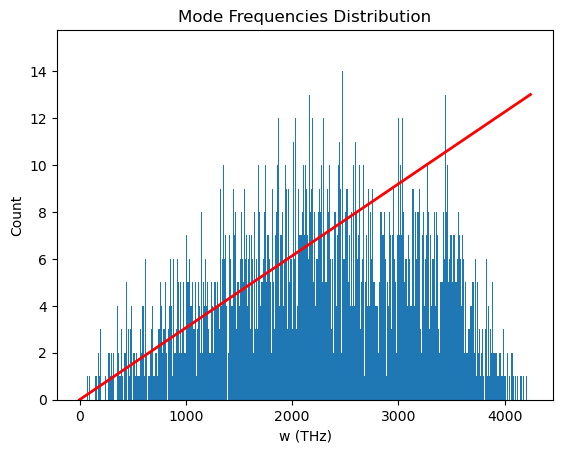

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 80
w_values = []

for i in range(n):
    for j in range(n):
        w = (3 * 10 * 1e8 / (2 * 3.4)) * np.sqrt(((i+1)/(1*1e-5))**2 + ((j+1)/(1*1.5*1e-5))**2) / (1 * 1e12)
        w_values.append(w)

# Convert to numpy array properly
w = np.array(w_values)

# Plot histogram with a sensible bin range
plt.hist(w, bins=np.arange(0, w.max() + 3, 3))
x = np.linspace(0, w.max(), 200)
y=1e12*(1*1e-5*1*1.5*1e-5)*3.4*3.4*x*1e12/(2*np.pi*(3*1e8)**2)
plt.plot(x, y, 'r-', linewidth=2)

plt.xlabel('w (THz)')
plt.ylabel('Count')
plt.title('Mode Frequencies Distribution')
plt.show()


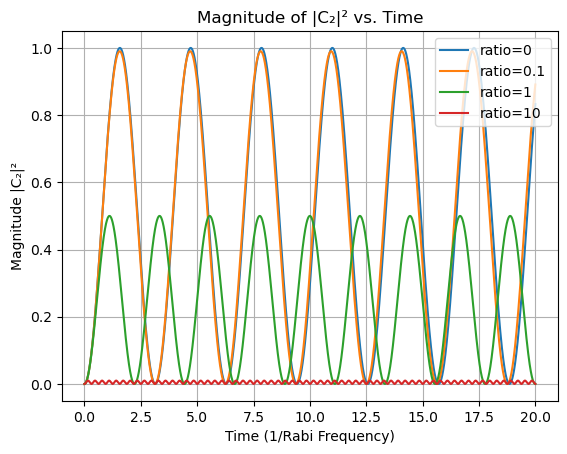

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
ratio = 0
time=np.arange(20000)/1000
c2Mag = np.sin(np.sqrt(1+ratio**2)*time)**2/(1+ratio**2)
plt.plot(time,c2Mag, label="ratio=0")
plt.title("Magnitude of |C₂|² vs. Time")
ratio=0.1
c2Mag = np.sin(np.sqrt(1+ratio**2)*time)**2/(1+ratio**2)
plt.plot(time,c2Mag, label="ratio=0.1")
ratio=1
c2Mag = np.sin(np.sqrt(1+ratio**2)*time)**2/(1+ratio**2)
plt.plot(time,c2Mag ,label="ratio=1")
ratio=10
c2Mag = np.sin(np.sqrt(1+ratio**2)*time)**2/(1+ratio**2)
plt.plot(time,c2Mag, label="ratio=10")
plt.xlabel("Time (1/Rabi Frequency)")
plt.ylabel("Magnitude |C₂|²")
plt.grid()
plt.legend()

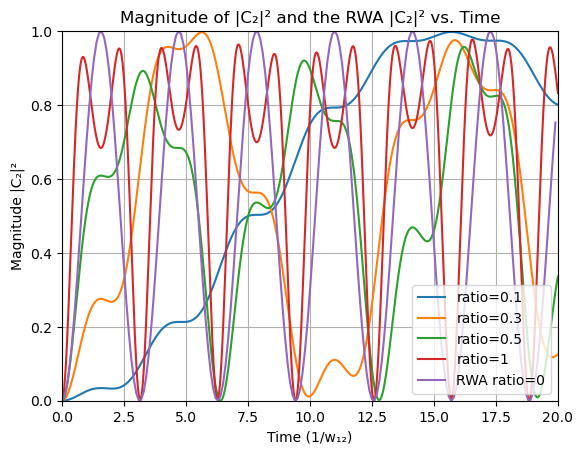

In [ ]:
ratio = 0.1
deltaT =0.0006
tf=50
ti=0
time=np.linspace(ti,tf,int((tf-ti)/deltaT)+1)
C2 = np.zeros(len(time), dtype = complex)
C1 = np.zeros(len(time), dtype = complex)
C1[0]=1
C2[0]=0

for i in range(len(time)-1):
    t=time[i]
    C2[i+1]= C2[i]+deltaT*(1j*ratio*(1+np.exp(-1j*2*t))*C1[i])
    C1[i+1]= C1[i]+deltaT*(1j*ratio*(1+np.exp(1j*2*t))*C2[i])
plt.plot(time,np.abs(C2)**2, label="ratio=0.1")
plt.title("Magnitude of |C₂|² and the RWA |C₂|² vs. Time")
plt.xlim([0,20])
plt.ylim([0,1])
C1[0]=1
C2[0]=0
ratio=0.3
for i in range(len(time)-1):
    t=time[i]
    C2[i+1]= C2[i]+deltaT*(1j*ratio*(1+np.exp(-1j*2*t))*C1[i])
    C1[i+1]= C1[i]+deltaT*(1j*ratio*(1+np.exp(1j*2*t))*C2[i])
plt.plot(time,np.abs(C2)**2, label="ratio=0.3")
C1[0]=1
C2[0]=0
ratio=0.5
for i in range(len(time)-1):
    t=time[i]
    C2[i+1]= C2[i]+deltaT*(1j*ratio*(1+np.exp(-1j*2*t))*C1[i])
    C1[i+1]= C1[i]+deltaT*(1j*ratio*(1+np.exp(1j*2*t))*C2[i])
plt.plot(time,np.abs(C2)**2, label="ratio=0.5")
C1[0]=1
C2[0]=0
ratio=1
for i in range(len(time)-1):
    t=time[i]
    C2[i+1]= C2[i]+deltaT*(1j*ratio*(1+np.exp(-1j*2*t))*C1[i])
    C1[i+1]= C1[i]+deltaT*(1j*ratio*(1+np.exp(1j*2*t))*C2[i])
plt.plot(time,np.abs(C2)**2, label="ratio=1")
ratio = 0
time=np.arange(200)/10
c2Mag = np.sin(np.sqrt(1+ratio**2)*time)**2/(1+ratio**2)
plt.plot(time,c2Mag, label="RWA ratio=0")
plt.xlabel("Time (1/w₁₂)")
plt.ylabel("Magnitude |C₂|²")
plt.grid()
plt.legend()

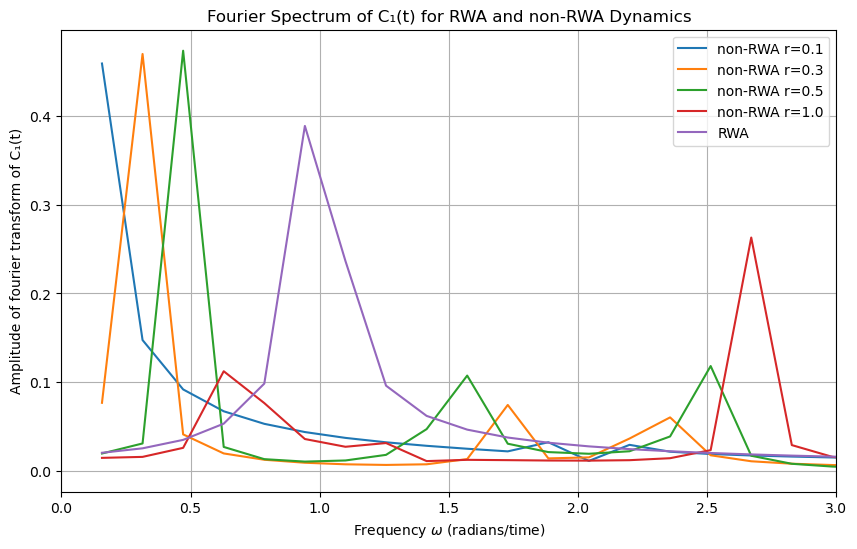

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
deltaT = 0.001
time = np.arange(0, 40, deltaT)
fs = 1/deltaT   # sampling frequency (1/time units)
signals = {}
# ---- Non-RWA numerical integration producing C1(t) ----
for r in [0.1, 0.3, 0.5, 1.0]:
    C1 = np.zeros(len(time), dtype=complex)
    C2 = np.zeros(len(time), dtype=complex)
    C1[0] = 1
    C2[0] = 0

    for i in range(len(time)-1):
        t = time[i]
        C2[i+1] = C2[i] + deltaT*(1j*r*(1 + np.exp(-1j*2*t)) * C1[i])
        C1[i+1] = C1[i] + deltaT*(1j*r*(1 + np.exp(1j*2*t)) * C2[i])

    signals[f"non-RWA r={r}"] = C1   # <--- use C1(t), not squared

# ---- RWA reference signal ----
time_rwa = time
C1_rwa = np.cos(time_rwa)            # under RWA, C1(t) = cos(t)
signals["RWA"] = C1_rwa

# ---- FFT Plot ----
plt.figure(figsize=(10,6))

for label, sig in signals.items():
    N = len(sig)
    yf = fft(sig) / N                # normalized FFT
    xf = 2*np.pi*fftfreq(N, deltaT)
    pos = xf > 0                     # positive frequencies only

    plt.plot(xf[pos], np.abs(yf[pos]), label=label)

plt.title("Fourier Spectrum of C₁(t) for RWA and non-RWA Dynamics")
plt.xlabel(r"Frequency $\omega$ (radians/time)")
plt.ylabel("Amplitude of fourier transform of C₁(t)")
plt.grid()
plt.legend()
plt.xlim(0,3)
plt.show()
